In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('./datasets/mnist_train_small.npy') #to load data as numpy array

In [3]:
data.shape #this means almost 20k rows(entries) along 
# with 785 columns ( features ) 

(19999, 785)

In [4]:
data #image is 28 x 28
# 0 column is Y rest 785-1 is X

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
X = data[:, 1:] #all rows and first col onwards
y = data[:, 0] #only first col

In [6]:
X.shape, y.shape

((19999, 784), (19999,))

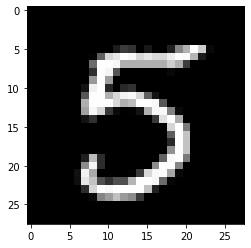

In [7]:
plt.imshow(X[0].reshape(28, 28), cmap='gray') #one image 28*28 pixels, cmap just color

In [8]:
y[0]

5

## K Nearest Neighbours, simple classification problem


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# to split the data of 20k cols

In [11]:
X_train.shape,X_test.shape,X.shape #train then test then total

((13399, 784), (6600, 784), (19999, 784))

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
model = KNeighborsClassifier() #inbuilt KNN

In [14]:
# training the model happens in fit function
# plotting the points on the graph
# no work is happening in traingin knn model
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
model.predict(X_test[:15])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2, 0, 6, 1, 9, 9], dtype=uint8)

In [16]:
y_test[:15]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2, 0, 6, 1, 9, 9], dtype=uint8)

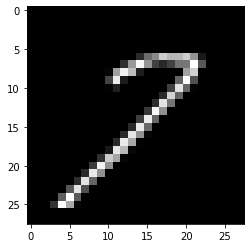

In [17]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray') #first element was predicted wrong

In [18]:
model.score(X_test[:100], y_test[:100]) #to check score

0.95

## Custom KNN

In [20]:
class CustomKNN:
    # constructor
    def __init__(self, n_neighbours=5):
        self.n_neighbours = n_neighbours
        
    # training function
    def fit(self, X, y):
        self._X = (X - X.mean()) / X.std() # standardisation :  This is the std. formula, makes data small, mean 0 deviation 1
        self._y = y
    
    # predict point
    # given a single point, tell me which class it belongs to 
    def predict_point(self, point):
        # storing the dis of given 'point' from each point in training data
        list_dist = []
        
        # these points are from my training data
        for x_point, y_point in zip(self._X, self._y):   #zip merges same elements of two lists
            dist_point = ((point - x_point) ** 2).sum()
            list_dist.append([dist_point, y_point])
        
        ## sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbours]
        
        # taking the count 
        items, counts = np.unique(np.array(top_k)[:, 1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # give me answer for each number in the array
    def predict(self, X):
        results = []
        X = (X - X.mean()) / X.std() 
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results, dtype=int)
    
    # score to measure my accuracy
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

In [21]:
m2 = CustomKNN()

In [22]:
m2.fit(X_train, y_train)

In [23]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [24]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [25]:
m2.score(X_test[:100], y_test[:100])

0.95